In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Import Data:
with open ('data/scrubbed_data_yelp_inspec_latest.pickle','rb') as f:
    df_latest = pickle.load(f)

df_latest = df_latest.reset_index(drop=True)

In [3]:
with open ('data/scrubbed_data_yelp_inspec_older.pickle','rb') as f:
    df_older = pd.read_pickle(f)

df_older = df_older.reset_index(drop=True)

In [5]:
# Import Model
with open ('models/gradient_boosting_model.pickle','rb') as f:
    gb_model = pickle.load(f)

In [6]:
df_older_train, df_older_val = train_test_split(df_older, test_size = 0.3, random_state = 42)

In [7]:
X_val = df_older_val.drop(columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','display_phone','CUISINE DESCRIPTION',
                           'INSPECTION DATE','ACTION','SCORE','GRADE DATE','INSPECTION TYPE','Latitude','Longitude',
                           'name','price','rating','review_count','transactions',
                            'categories_clean','latitude','longitude','address','city','zip_code',
                            'state','num_of_cat','combined_score', 'GRADE'],
                   axis=1)

y_val= df_older_val.loc[:,'combined_score']

In [8]:
y_val_pred = gb_model.predict(X_val)

(array([  1.,   1.,   4.,  11.,  20.,  57., 105., 180., 222., 107.]),
 array([-0.04975318,  0.03481014,  0.11937347,  0.2039368 ,  0.28850012,
         0.37306345,  0.45762677,  0.5421901 ,  0.62675342,  0.71131675,
         0.79588007]),
 <BarContainer object of 10 artists>)

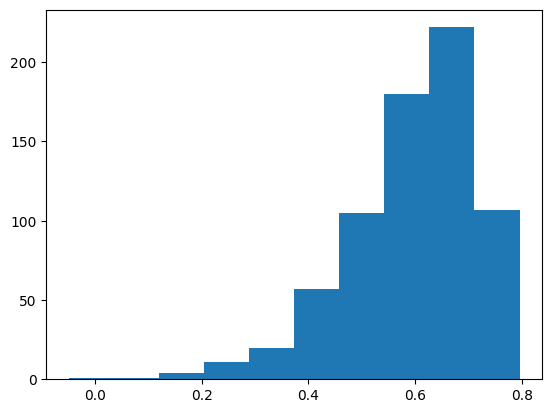

In [9]:
plt.hist(y_val_pred)

In [10]:
number_selected_restaurants = 50
selected_successful_benefit = 14000
selected_unsuccessful_cost = 5000

In [21]:
# df_latest['pred_score']   = y_pred
# df_latest['pred_profit']  = df_latest['pred_score']*selected_successful_benefit - (1-df_latest['pred_score'])*selected_unsuccessful_cost

In [11]:
df_older_val['pred_score'] = y_val_pred
df_older_val['pred_profit']  = df_older_val['pred_score']*selected_successful_benefit - (1-df_older_val['pred_score'])*selected_unsuccessful_cost

In [13]:
df_older_train['pred_score'] = df_older_train['combined_score']
df_older_train['pred_profit']  = df_older_train['pred_score']*selected_successful_benefit - (1-df_older_train['pred_score'])*selected_unsuccessful_cost

In [14]:
df_older = pd.concat([df_older_train,df_older_val],axis=0)

In [51]:
df_older_train, df_older_val = train_test_split(df_older, test_size = 0.3, random_state = 42)

In [15]:
df_older.shape

(2357, 329)

In [16]:
df_older_train.shape

(1649, 329)

In [17]:
df_older_val['CUISINE DESCRIPTION'].value_counts()

American                          155
Italian                            89
Chinese                            52
Japanese                           45
Pizza                              41
Mexican                            22
Asian/Asian Fusion                 22
French                             21
Thai                               21
Mediterranean                      19
Coffee/Tea                         18
Indian                             17
Latin American                     16
Irish                              14
Korean                             12
Steakhouse                         11
Australian                         10
Tex-Mex                             9
Chicken                             8
Seafood                             7
Salads                              7
Spanish                             7
Hamburgers                          7
Jewish/Kosher                       6
Sandwiches/Salads/Mixed Buffet      6
Middle Eastern                      5
Sandwiches  

In [18]:
def restaurant_cuisine_entropy(cuisines):
    cuisine_counts = cuisines.value_counts()
    cuisine_probs = cuisine_counts/cuisine_counts.sum()
    return -(cuisine_probs*np.log(cuisine_probs)).sum()


## Prioritize entropy over profit 

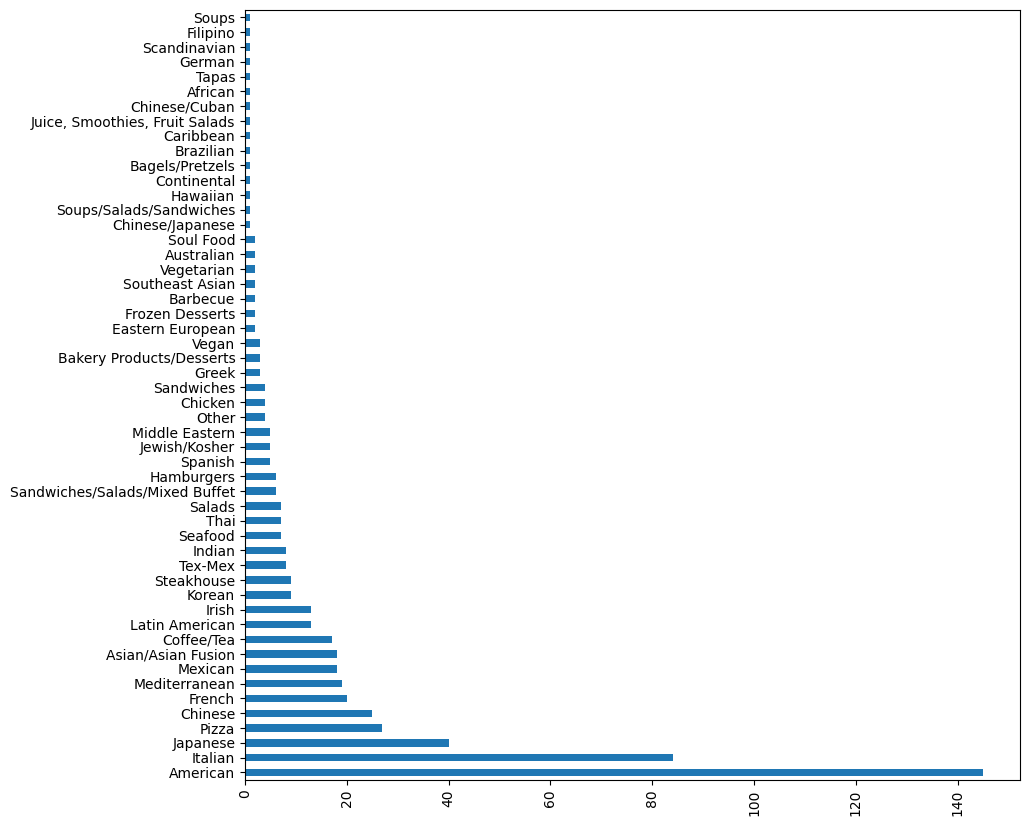

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
df_older_val.loc[df_older_val['pred_score']>0.5,'CUISINE DESCRIPTION'].value_counts().plot(kind='barh')
plt.xticks(rotation=90)
plt.show()

In [20]:
# cuisine_counts = df_latest.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].count().sort_values(ascending=False).to_dict()
# cuisine_counts

atleast 5 different cuisines

In [21]:
df_older_val_high_score = df_older_val.loc[df_older_val['pred_score']>0.5,:]

In [22]:
df_older_val_high_score.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,count_range_21-30,count_range_31+,count_range_6-10,price_value_0.0,price_value_1.0,price_value_2.0,price_value_3.0,price_value_4.0,pred_score,pred_profit
1604,50016155,PINKS,Manhattan,242,EAST 10 STREET,10003.0,(646) 918-6231,American,2022-04-06,Violations were cited in the following area(s).,...,0,0,0,0,0,1,0,0,0.735801,8980.222753
2122,41298603,THE SMITH,Manhattan,55,3 AVENUE,10003.0,(212) 420-9800,American,2022-03-17,Violations were cited in the following area(s).,...,0,0,0,0,0,1,0,0,0.650834,7365.853713
1798,40643163,SHADE,Manhattan,241,SULLIVAN STREET,10012.0,(212) 982-6275,American,2022-03-07,Violations were cited in the following area(s).,...,0,0,1,0,0,1,0,0,0.636017,7084.317047
1137,41627996,LA COLOMBE,Manhattan,400,LAFAYETTE STREET,10003.0,(212) 677-5834,Coffee/Tea,2022-12-20,Violations were cited in the following area(s).,...,0,0,0,0,0,1,0,0,0.636235,7088.471672
432,50075962,CHAMPION PIZZA,Manhattan,17,CLEVELAND PLACE,10012.0,(212) 226-3777,Pizza,2022-10-05,Violations were cited in the following area(s).,...,0,0,1,0,1,0,0,0,0.620195,6783.696573


In [23]:
df_older_val_high_score['CUISINE DESCRIPTION'].value_counts()

American                          145
Italian                            84
Japanese                           40
Pizza                              27
Chinese                            25
French                             20
Mediterranean                      19
Mexican                            18
Asian/Asian Fusion                 18
Coffee/Tea                         17
Latin American                     13
Irish                              13
Korean                              9
Steakhouse                          9
Tex-Mex                             8
Indian                              8
Seafood                             7
Thai                                7
Salads                              7
Sandwiches/Salads/Mixed Buffet      6
Hamburgers                          6
Spanish                             5
Jewish/Kosher                       5
Middle Eastern                      5
Other                               4
Chicken                             4
Sandwiches  

In [24]:
number_bins = 5

In [25]:
ordered_cuisines = df_older_val_high_score.groupby(
    'CUISINE DESCRIPTION'
    )['CUISINE DESCRIPTION'].count().sort_values(ascending=False).index
cuisine_map = {cuisine: i for i, cuisine in enumerate(ordered_cuisines)}
df_older_val_high_score['cuisine_index'] = df_older_val_high_score['CUISINE DESCRIPTION'].map(cuisine_map)
df_older_val_high_score['entropy_bins'] = pd.cut(df_older_val_high_score['cuisine_index'], bins=number_bins, labels=False)
df_older_val_high_score['entropy_bins'].value_counts()

0    426
1     80
2     38
3     16
4     11
Name: entropy_bins, dtype: int64

In [26]:
entropy_bins = [i for i in range(number_bins)]

In [27]:
selected_restaurants = pd.DataFrame(columns=df_older_val_high_score.columns)
profits = []
for bin in entropy_bins:
    current_bin = df_older_val_high_score.loc[
        (
            (df_older_val_high_score['entropy_bins']==bin) 
        )]
    current_bin_pred_score = current_bin['pred_score']
    # current_bin.loc[:,'pred_profit'] = current_bin_pred_score*selected_successful_benefit - (1-current_bin_pred_score)*selected_unsuccessful_cost
    top_n_restaurants = current_bin.sort_values(
        by='pred_profit',
        ascending=False
    ).head(int(number_selected_restaurants/number_bins))
    print(len(top_n_restaurants))
    selected_restaurants = pd.concat((selected_restaurants,top_n_restaurants))
    profits.extend(top_n_restaurants['pred_profit'].values)

10
10
10
10
10


<Axes: >

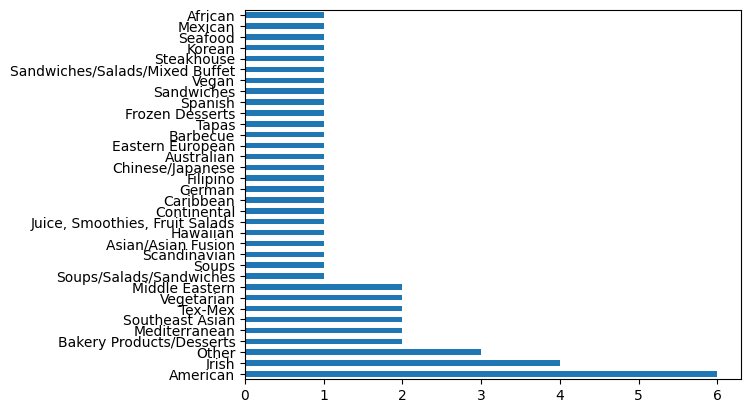

In [28]:
selected_restaurants['CUISINE DESCRIPTION'].value_counts().plot(kind='barh')

In [29]:
restaurant_cuisine_entropy(selected_restaurants['CUISINE DESCRIPTION'])

3.3538362595767146

In [30]:
selected_restaurants['pred_profit'].sum()

430803.8771427822

In [31]:
selected_restaurants['CUISINE DESCRIPTION'].nunique()

34

## Prioritize profit

In [32]:
df_older_val_top100_score = df_older_val_high_score.sort_values(by='pred_score',ascending=False).head(100)

<Axes: >

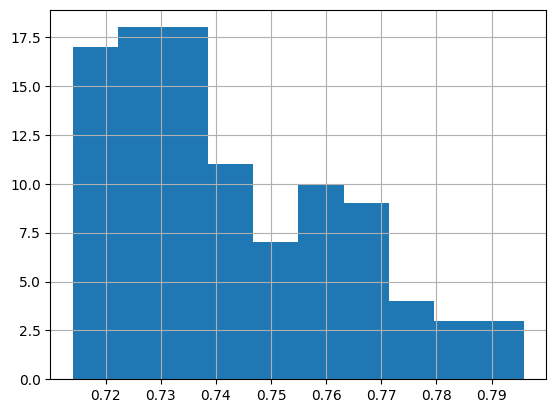

In [33]:
df_older_val_top100_score['pred_score'].hist()

<Axes: >

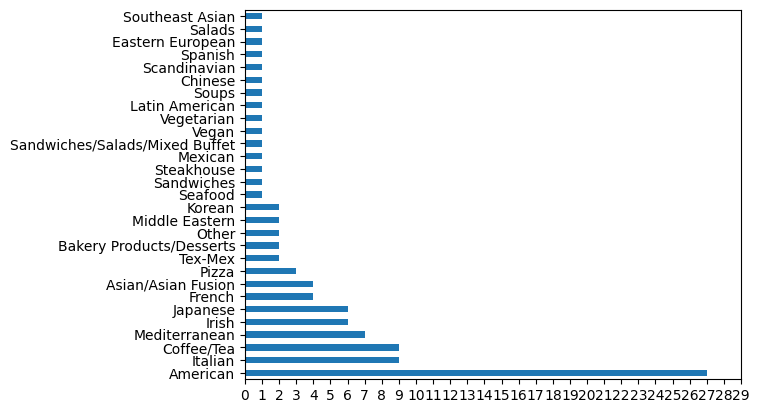

In [34]:
df_older_val_top100_score['CUISINE DESCRIPTION'].value_counts().plot(kind='barh',xticks=range(0,30))

In [42]:
selected_restaurants = pd.DataFrame(columns=df_older_val_top100_score.columns)
for cuisine in df_older_val_top100_score['CUISINE DESCRIPTION'].unique():
    df_current_cuisine = df_older_val_top100_score.loc[
        df_older_val_top100_score['CUISINE DESCRIPTION']==cuisine,:]
    df_current_cuisine.loc[:,'pred_profit'] = df_current_cuisine['pred_score']*selected_successful_benefit - (1-df_current_cuisine['pred_score'])*selected_unsuccessful_cost
    df_current_cuisine.sort_values(by='pred_profit',ascending=False,inplace=True)
    proportional_restaurant_count = int(len(df_current_cuisine)/2) if int(len(df_current_cuisine)/2)>0 else 1
    df_current_cuisine = df_current_cuisine.head(proportional_restaurant_count)
    selected_restaurants = pd.concat((selected_restaurants,df_current_cuisine))

selected_restaurants = selected_restaurants.sort_values(by='pred_profit',ascending=False).head(50)

In [43]:
selected_restaurants.shape

(50, 331)

<Axes: >

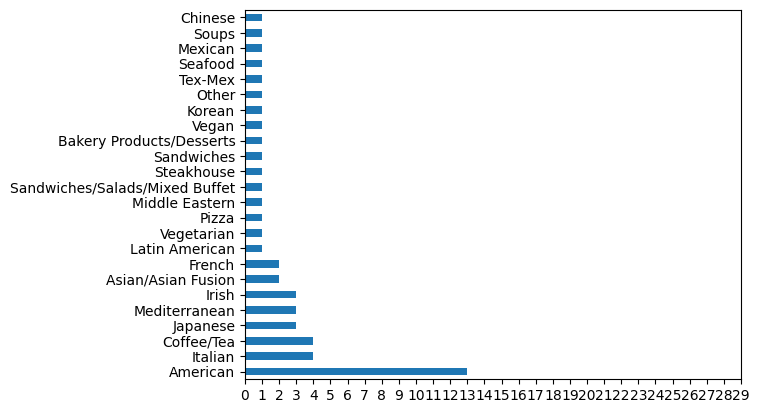

In [44]:
selected_restaurants['CUISINE DESCRIPTION'].value_counts().plot(kind='barh',xticks=range(0,30))

In [45]:
restaurant_cuisine_entropy(selected_restaurants['CUISINE DESCRIPTION'])

2.7701270883039086

In [46]:
selected_restaurants['pred_profit'].sum()

469723.9859057904

In [47]:
selected_restaurants['CUISINE DESCRIPTION'].nunique()

24

## Consider only profit..and just take the top 50 restaurants

In [48]:
df_older_val_top50_score = df_older_val_high_score.sort_values(by='pred_score',ascending=False).head(50)

In [49]:
restaurant_cuisine_entropy(df_older_val_top50_score['CUISINE DESCRIPTION'])

2.6743790844393756

In [50]:
df_older_val_top50_score['pred_profit'].sum()

470780.4505189051

In [51]:
df_older_val_top50_score['CUISINE DESCRIPTION'].nunique()

23

## Final Deployment

In [54]:
X_test = df_latest.drop(columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','display_phone','CUISINE DESCRIPTION',
                           'INSPECTION DATE','ACTION','SCORE','GRADE DATE','INSPECTION TYPE','Latitude','Longitude',
                           'name','price','rating','review_count','transactions',
                            'categories_clean','latitude','longitude','address','city','zip_code',
                            'state','num_of_cat','combined_score', 'GRADE'],
                   axis=1)

y_test= df_latest.loc[:,'combined_score']

In [55]:
y_test_pred = gb_model.predict(X_test)

(array([  7.,   6.,  19.,  32.,  69., 129., 192., 186., 132.,  45.]),
 array([0.1053972 , 0.17523789, 0.24507859, 0.31491928, 0.38475997,
        0.45460066, 0.52444135, 0.59428205, 0.66412274, 0.73396343,
        0.80380412]),
 <BarContainer object of 10 artists>)

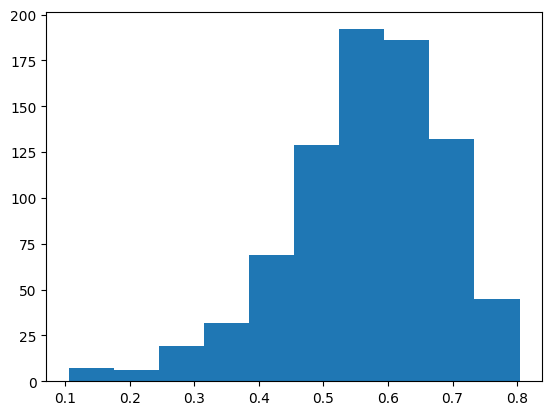

In [57]:
plt.hist(y_test_pred)

In [58]:
df_latest['pred_score'] = y_test_pred
df_latest['pred_profit']  = df_latest['pred_score']*selected_successful_benefit - (1-df_latest['pred_score'])*selected_unsuccessful_cost

In [59]:
df_all = pd.concat((df_latest,df_older))

In [60]:
df_all_high_score = df_all.loc[df_all['pred_score']>0.5,:]

<Axes: >

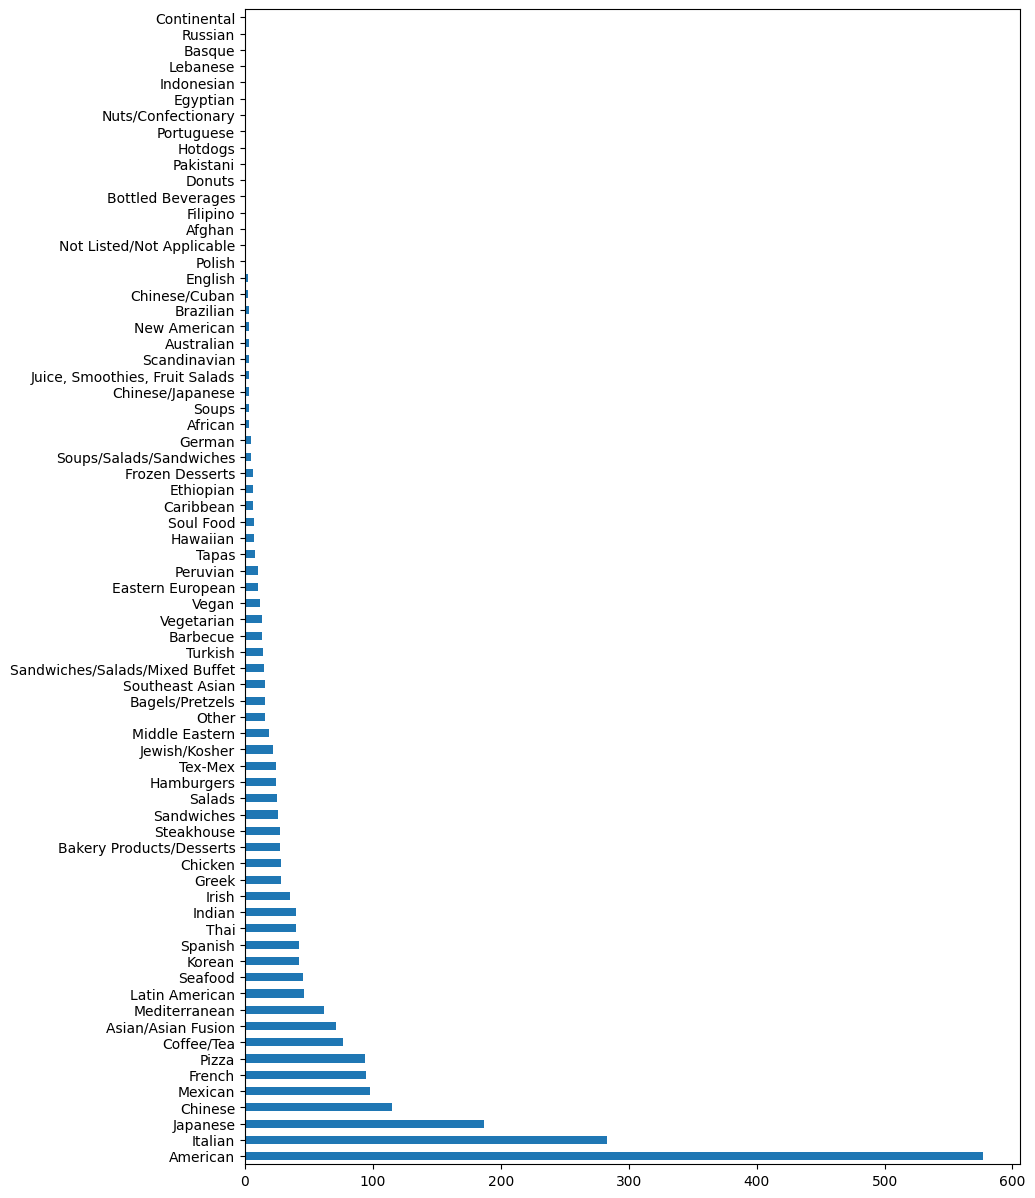

In [61]:
df_all_high_score['CUISINE DESCRIPTION'].value_counts().plot(kind='barh', figsize=(10,15))

In [62]:
ordered_cuisines = df_all_high_score.groupby(
    'CUISINE DESCRIPTION'
    )['CUISINE DESCRIPTION'].count().sort_values(ascending=False).index
cuisine_map = {cuisine: i for i, cuisine in enumerate(ordered_cuisines)}
df_all_high_score['cuisine_index'] = df_all_high_score['CUISINE DESCRIPTION'].map(cuisine_map)
df_all_high_score['entropy_bins'] = pd.cut(df_all_high_score['cuisine_index'], bins=number_bins, labels=False)
df_all_high_score['entropy_bins'].value_counts()

0    1874
1     357
2     143
3      40
4      14
Name: entropy_bins, dtype: int64

In [63]:
number_bins = 5
entropy_bins = [i for i in range(number_bins)]

In [64]:
selected_restaurants = pd.DataFrame(columns=df_all_high_score.columns)
profits = []
for bin in entropy_bins:
    current_bin = df_all_high_score.loc[
        (
            (df_all_high_score['entropy_bins']==bin) 
        )]
    current_bin_pred_score = current_bin['pred_score']
    top_n_restaurants = current_bin.sort_values(
        by='pred_profit',
        ascending=False
    ).head(int(number_selected_restaurants/number_bins))
    print(len(top_n_restaurants))
    selected_restaurants = pd.concat((selected_restaurants,top_n_restaurants))
    profits.extend(top_n_restaurants['pred_profit'].values)

10
10
10
10
10


In [65]:
restaurant_cuisine_entropy(selected_restaurants['CUISINE DESCRIPTION'])

3.586108320231188

In [66]:
selected_restaurants['pred_profit'].sum()

589748.9507571389

In [67]:
selected_restaurants['CUISINE DESCRIPTION'].nunique()

39